<a href="https://colab.research.google.com/github/principioincertidumbre/ComputerVision/blob/main/IntroCV_Tarea_2_Sof%C3%ADa_Vits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 2</h1>
</center>

### Magíster en Data Science
### U. del Desarrollo

-----------------------
<div align="right">

Estudiante: Sofía Vits

Profesor: Takeshi Asahi

Fecha de Entrega: Lunes 5, Mayo 20245.
</div>

## Instrucciones

1. Diseñar un flujo de procesamiento a nivel abstracto: adquisición de imágenes, pre-procesamiento, procesamiento de imágenes, cálculo de la medición, almacenamiento.

2. Con la base de datos seleccionada, implementar un sistema de reconocimiento y/o procesamiento en el cual se realice una medida o inferencia sobre imagen. Puede ser la detección de un objeto, medición de distancias entre píxeles de alguna característica, medición del tamaño de algún objeto (en cantidad de píxeles) clasificación de la imagen, entre otros.

3. Para procesar el conjunto completo de imágenes, medir los tiempos de ejecución del proceso completo. Realizar la medición para el 50% y el 100% de la imágenes varias veces, de manera de obtener algunas figuras estadísticas: tiempo máximo, tiempo mínimo, tiempo medio, desviación estándar del tiempo.

4. Hacer resumen de los resultados del procesamiento. Para ello debe decidir una métrica para indicar si el procesamiento es satisfactorio. Para esto último algunas veces es necesario hacer la evaluación en forma manual, por lo tanto, si fuera este el caso, seleccionar un sub-conjunto de las imágenes (por ejemplo, unas 50) y comparar el desempeño del algoritmo en estas imágenes.

## Formato de Entrega:
1. Escribir un informe o entregar el notebook con comentarios y documentación, incluyendo el análisis (comentando) los resultados. Recordar las recomendaciones de la Tarea 1, de **no mostrar todas las imágenes procesadas en el notebook** sino que solamente un número reducido de ejemplos. Los comentarios son muy importantes.

2. De percatarse que si encontrarn que el set de imágenes propuesto en la Tarea 1 no es el adecuado, se puede realizar un cambio en el dataset. Justificar el cambio. Este tipo de decisiones puede ocurrir en un proyecto. Muchas veces es necesario probar una variedad de datasets.

3. No está permitido el uso de Herramientas de Inteligencia Artificial para generar el informe. El uso de Inteligencia Artificial Generativa solamente se remite a la sugerencia de código parcial, como copilot.

# Introducción

La papas es un tubérculo que fue domesticado en la región andina de Sudamérica. Junto con el trigo y arroz, es uno de los cultivos más importantes para la alimentación de la especie humana.

Lamentablemente, existen enfermedades de las papas que generan pérdidas económicas y afectan la calidad del producto final. Por lo tanto, es importante detectar estas enfermedades a tiempo.

El dataset "Potato Diseases Datasets" fue compilado a partir de diversas páginas web, siendo validado por el Instituto de Investigación Agrícola de Bangladesh (BARI).

El dataset completo contiene 451 imágenes, siendo clasificadas como common scab (papas infectadas por bacteria Streptomyces scabies, contiene 62 imágenes), blackleg (papas infectadas por bacteria Pectobacterium atrosepticum, contiene 60 imágenes), dry rot (infección causada por hongos del género Fusarium, contiene 60 imágenes), pink rot (infección fúngica causada por Phytophthora erythroseptica, contiene 57 imágenes), black scurf (infección fúngica, contiene 58 imágenes), papas sanas (80 imágenes) y papas afectadas por otros tipos de infecciones (74 imágenes).

Considerando las enfermedades más comunes de la papa en Chile, se considerarán las clases common scab, blackleg, dry rot y papas sanas para realizar una clasificación multiclase mediante el algoritmo Support Vector Machine (SVM). Esta muestra del dataset contiene 262 imágenes en total.


Dataset utilizado:

https://www.kaggle.com/datasets/mukaffimoin/potato-diseases-datasets/

Fuente del dataset:

F. T. J. Faria, M. Bin Moin, A. Al Wase, M. R. Sani, K. M. Hasib and M. S. Alam, "Classification of Potato Disease with Digital Image Processing Technique: A Hybrid Deep Learning Framework," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0820-0826, doi: 10.1109/CCWC57344.2023.10099162.

Otras fuentes:

Centro Internacional de la Papa. "Datos y cifras de la papa". Recuperado de: https://cipotato.org/es/potato/potato-facts-and-figures/

Méndez, P., Gaete, N. "Principales enfermedades que afectan al cultivo de la papa", INIA Carillanca. Recuperado de: https://tizon.inia.cl/assets/boletines/inia%20carillanca%20-%20principales%20enfermedades%20que%20afectan%20el%20cultivo%20de%20la%20papa.pdf

North Dakota State University. "Common scab". Recuperado de: https://www.ag.ndsu.edu/potatoextension/common-scab

The Royal Horticultural Society. "Potato blackleg". Recuperado de: https://www.rhs.org.uk/disease/potato-blackleg

Cornell University. "Fusarium Dry Rot of Potato". Recuperado de: https://www.vegetables.cornell.edu/pest-management/disease-factsheets/fusarium-dry-rot-of-potato/

# Metodología

1.- Cargar la muestra del dataset y ordenar las carpetas a utilizar para el algoritmo de clasificación SVM multiclase.

2.- Implementar algoritmo de clasificación SVM multiclase, midiendo el tiempo mínimo, tiempo máximo, tiempo promedio y desviación estándard del tiempo de procesamiento.

3.- Comparar los resultados mediante métricas para verificar qué tipo de preprocesamiento permite obtener los mejores resultados.


# Desarrollo

In [19]:
from PIL import Image
from os.path import exists
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import pandas as pd
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Abrir una imagen de cada carpeta que contiene imágenes de papas enfermas o sanas

inPath1  = '/content/drive/MyDrive/potato/Common Scab proc'
inPath2  = '/content/drive/MyDrive/potato/Blackleg proc'
inPath3  = '/content/drive/MyDrive/potato/Dry Rot proc'
inPath4 = '/content/drive/MyDrive/potato/Healthy Potatoes proc'
inPath5 = '/content/drive/MyDrive/potato/Common Scab Gauss'
inPath6 = '/content/drive/MyDrive/potato/Blackleg Gauss'
inPath7 = '/content/drive/MyDrive/potato/Dry Rot Gauss'
inPath8 = '/content/drive/MyDrive/potato/Healthy Potatoes Gauss'
inPath9 = '/content/drive/MyDrive/potato/Common Scab Sobel'
inPath10 = '/content/drive/MyDrive/potato/Blackleg Sobel'
inPath11 = '/content/drive/MyDrive/potato/Dry Rot Sobel'
inPath12 = '/content/drive/MyDrive/potato/Healthy Potatoes Sobel'
inPath13 = '/content/drive/MyDrive/potato/Common Scab Max'
inPath14 = '/content/drive/MyDrive/potato/Blackleg Max'
inPath15 = '/content/drive/MyDrive/potato/Dry Rot Max'
inPath16 = '/content/drive/MyDrive/potato/Healthy Potatoes Max'
inPath17 = '/content/drive/MyDrive/potato/Common Scab Min'
inPath18 = '/content/drive/MyDrive/potato/Blackleg Min'
inPath19 = '/content/drive/MyDrive/potato/Dry Rot Min'
inPath20 = '/content/drive/MyDrive/potato/Healthy Potatoes Min'

# Define carpetas de salida, las cuales serán creadas posteriormente en este trabajo

outPath1  = '/content/drive/MyDrive/potato/data/common_scab'
outPath2  = '/content/drive/MyDrive/potato/data/blackleg'
outPath3  = '/content/drive/MyDrive/potato/data/dry_rot'
outPath4 = '/content/drive/MyDrive/potato/data/healthy_potato'
outPath5 = '/content/drive/MyDrive/potato/data_g/common_scab'
outPath6 = '/content/drive/MyDrive/potato/data_g/blackleg'
outPath7 = '/content/drive/MyDrive/potato/data_g/dry_rot'
outPath8 = '/content/drive/MyDrive/potato/data_g/healthy_potato'
outPath9 = '/content/drive/MyDrive/potato/data_s/common_scab'
outPath10 = '/content/drive/MyDrive/potato/data_s/blackleg'
outPath11 = '/content/drive/MyDrive/potato/data_s/dry_rot'
outPath12 = '/content/drive/MyDrive/potato/data_s/healthy_potato'
outPath13 = '/content/drive/MyDrive/potato/data_max/common_scab'
outPath14 = '/content/drive/MyDrive/potato/data_max/blackleg'
outPath15 = '/content/drive/MyDrive/potato/data_max/dry_rot'
outPath16 = '/content/drive/MyDrive/potato/data_max/healthy_potato'
outPath17 = '/content/drive/MyDrive/potato/data_min/common_scab'
outPath18 = '/content/drive/MyDrive/potato/data_min/blackleg'
outPath19 = '/content/drive/MyDrive/potato/data_min/dry_rot'
outPath20 = '/content/drive/MyDrive/potato/data_min/healthy_potato'

In [ ]:
# Copia archivos

import glob

# Carpeta Common Scab
path = outPath1 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path):
    os.makedirs(path)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path2 = outPath2

if not os.path.exists(path2):
    os.makedirs(path2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path2,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path3 = outPath3

if not os.path.exists(path3):
    os.makedirs(path3)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path3,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path4 = outPath4

if not os.path.exists(path4):
    os.makedirs(path4)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path4,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Gaussiano

import glob

# Carpeta Common Scab
path5 = outPath5 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path5):
    os.makedirs(path5)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Gauss/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path5,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path6 = outPath6

if not os.path.exists(path6):
    os.makedirs(path6)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path6,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path7 = outPath7

if not os.path.exists(path7):
    os.makedirs(path7)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path7,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path8 = outPath8

if not os.path.exists(path8):
    os.makedirs(path8)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path8,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Sobel

import glob

# Carpeta Common Scab
path9 = outPath9 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path9):
    os.makedirs(path9)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Sobel/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path9,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path10 = outPath10

if not os.path.exists(path10):
    os.makedirs(path10)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Sobel/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path10,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path11 = outPath11

if not os.path.exists(path11):
    os.makedirs(path11)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path11,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path12 = outPath12

if not os.path.exists(path12):
    os.makedirs(path12)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path12,'/',os.path.split(filename)[1]))

In [5]:
# Copia archivos filtro Máximo

import glob

# Carpeta Common Scab
path13 = outPath13 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path13):
    os.makedirs(path13)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Max/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path13,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path14 = outPath14

if not os.path.exists(path14):
    os.makedirs(path14)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path14,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path15 = outPath15

if not os.path.exists(path15):
    os.makedirs(path15)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path15,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path16 = outPath16

if not os.path.exists(path16):
    os.makedirs(path16)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path16,'/',os.path.split(filename)[1]))

In [6]:
# Copia archivos filtro Mínimo

import glob

# Carpeta Common Scab
path17 = outPath17 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path17):
    os.makedirs(path17)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Min/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path17,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path18 = outPath18

if not os.path.exists(path18):
    os.makedirs(path18)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path18,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path19 = outPath19

if not os.path.exists(path19):
    os.makedirs(path19)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path19,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path20 = outPath20

if not os.path.exists(path20):
    os.makedirs(path20)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path20,'/',os.path.split(filename)[1]))

## Clasificador Support Vector Machine para dataset sin filtrar

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [10]:
Categoría=['blackleg', 'common_scab', 'dry_rot', 'healthy_potato']

In [11]:
ex_time_nf = []
half_time_nf = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr=[]
    target_arr = []
    datadir ='/content/drive/MyDrive/potato/data'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categoría.index(i))
    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)
    df_papa=pd.DataFrame(flat_data)
    df_papa['Categoría']=target
    df_papa

    x=df_papa.iloc[:,:-1]
    y=df_papa.iloc[:,-1]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_nf.append(total)
    half_t = (total/2)
    half_time_nf.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 93.23178426699997 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.206557576999785 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.084052337999765 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 31.186815162999665 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 26.6975123039997 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 49.86281624200001 s
loading... category : blackleg
l

In [58]:
print("Tiempo mínimo ", min(ex_time_nf), 's')
print("Tiempo máximo: ", max(ex_time_nf), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_nf), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_nf), 's')

Tiempo mínimo  18.084052337999765 s
Tiempo máximo:  93.23178426699997 s
Tiempo promedio:  41.191897202733344 s
Desviación estándar del tiempo:  18.427966179565946 s


In [59]:
print("Tiempo mínimo mitad ejecución ", min(half_time_nf), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_nf), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_nf)/len(half_time_nf), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_nf), 's')

Tiempo mínimo mitad ejecución  9.042026168999882 s
Tiempo máximo mitad ejecución:  46.61589213349998 s
Tiempo promedio mitad ejecución:  20.595948601366672 s
Desviación estándar del tiempo mitad ejecución:  9.213983089782973 s


In [14]:
y_pred

array([3, 3, 3, 2, 2, 2, 0, 3, 0, 1, 0, 3, 3, 3, 3, 3, 1, 0, 3, 1, 2, 2,
       0, 3, 2, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 2, 1,
       1, 1, 3, 0, 2, 2, 3, 0, 1])

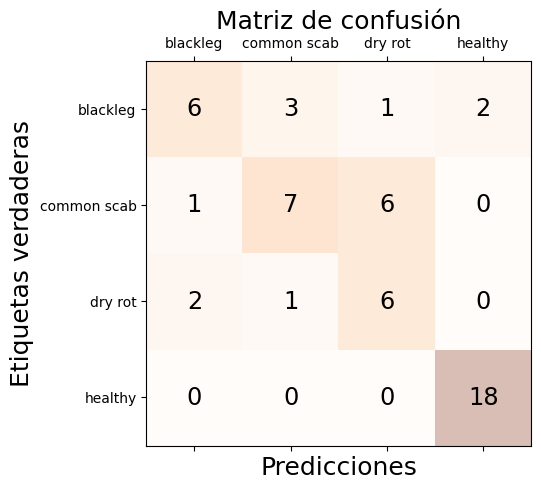

In [29]:
import warnings
warnings.filterwarnings("ignore")

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

labels=['blackleg', 'common scab', 'dry rot', 'healthy']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Etiquetas verdaderas', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()

In [30]:
print('Accuracy  :', accuracy_score(y_test, y_pred)*100 ,"%")
print('Precision :' , precision_score(y_test, y_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_test, y_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_test, y_pred, average='weighted')*100 ,"%")

Accuracy  : 69.81132075471697 %
Precision : 70.30742842063596 %
Recall    : 69.81132075471697 %
F1 Score  : 69.1676704626059 %


## Clasificador Support Vector Machine para dataset filtro Gaussiano

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [31]:
ex_time = []
half_time = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_g=[]
    target_arr_g=[]
    datadir_g='/content/drive/MyDrive/potato/data_g'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_g,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_g.append(img_resized.flatten())
            target_arr_g.append(Categoría.index(i))
    flat_data_g=np.array(flat_data_arr_g)
    target_g=np.array(target_arr_g)
    df_papa_g=pd.DataFrame(flat_data_g)
    df_papa_g['Categoría']=target_g
    df_papa_g

    x_g=df_papa_g.iloc[:,:-1]
    y_g=df_papa_g.iloc[:,-1]
    x_g_train,x_g_test,y_g_train,y_g_test=train_test_split(x_g,y_g,test_size=0.20,random_state=42)

    classifier_g = SVC(kernel = 'rbf', random_state = 0)
    classifier_g.fit(x_g_train, y_g_train)

    y_g_pred = classifier_g.predict(x_g_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time.append(total)
    half_t = (total/2)
    half_time.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 118.76881822699988 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.18719168000007 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.901150559000143 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 19.62176882699987 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.261704919000294 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.40187686299987 s
loading... category : blackleg


In [67]:
print("Tiempo mínimo ", min(ex_time), 's')
print("Tiempo máximo: ", max(ex_time), 's')
print("Tiempo promedio: ", sum(ex_time)/len(ex_time),'s')
print("Desviación estándar del tiempo: ", np.std(ex_time), 's')

Tiempo mínimo  15.901150559000143 s
Tiempo máximo:  118.76881822699988 s
Tiempo promedio:  29.238334655533404 s
Desviación estándar del tiempo:  24.442082412815964 s


In [66]:
print("Tiempo mínimo mitad ejecución ", min(half_time), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time)/len(half_time), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time), 's')

Tiempo mínimo mitad ejecución  7.950575279500072 s
Tiempo máximo mitad ejecución:  59.38440911349994 s
Tiempo promedio mitad ejecución:  14.619167327766702 s
Desviación estándar del tiempo mitad ejecución:  12.221041206407982 s


In [34]:
y_g_pred

array([3, 3, 3, 2, 0, 0, 1, 3, 0, 2, 1, 3, 0, 3, 3, 3, 1, 0, 3, 1, 1, 2,
       2, 3, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 2, 3, 3, 2, 3, 2, 1, 2,
       0, 0, 3, 0, 1, 1, 3, 2, 0])

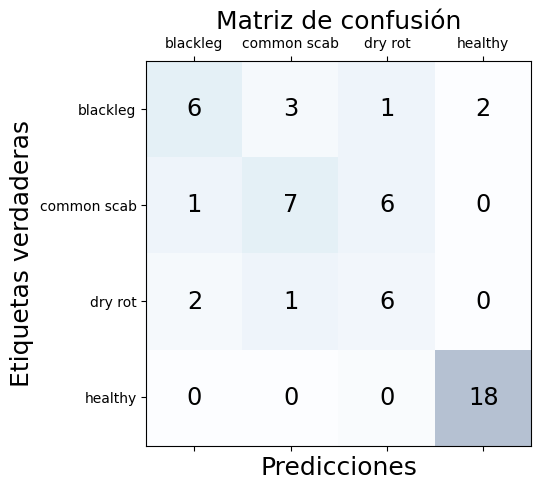

In [35]:
cm_g = confusion_matrix(y_g_test, y_g_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_g, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_g.shape[0]):
    for j in range(cm_g.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

labels=['blackleg', 'common scab', 'dry rot', 'healthy']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Etiquetas verdaderas', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()

In [36]:
print('Accuracy  :', accuracy_score(y_g_test, y_g_pred)*100 ,"%")
print('Precision :' , precision_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")

Accuracy  : 60.37735849056604 %
Precision : 62.735849056603776 %
Recall    : 60.37735849056604 %
F1 Score  : 61.356002488077955 %


## Clasificador Support Vector Machine para dataset filtro Sobel

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [37]:
ex_time_s = []
half_time_s = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_s=[]
    target_arr_s=[]
    datadir_s='/content/drive/MyDrive/potato/data_s'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_s.append(img_resized.flatten())
            target_arr_s.append(Categoría.index(i))
    flat_data_s=np.array(flat_data_arr_s)
    target_s=np.array(target_arr_s)
    df_papa_s=pd.DataFrame(flat_data_s)
    df_papa_s['Categoría']=target_s
    df_papa_s

    x_s=df_papa_s.iloc[:,:-1]
    y_s=df_papa_s.iloc[:,-1]
    x_s_train,x_s_test,y_s_train,y_s_test=train_test_split(x_s,y_s,test_size=0.20,random_state=42)

    classifier_s = SVC(kernel = 'rbf', random_state = 0)
    classifier_s.fit(x_s_train, y_s_train)

    y_s_pred = classifier_s.predict(x_s_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_s.append(total)
    half_t = (total/2)
    half_time_s.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 112.53506892799987 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 17.78858934500022 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 17.002295441000115 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 21.776311388999602 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 23.32353158399974 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 20.72342556500007 s
loading... category : blackleg


In [65]:
print("Tiempo mínimo ", min(ex_time_s), 's')
print("Tiempo máximo: ", max(ex_time_s), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_s), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_s), 's')

Tiempo mínimo  17.002295441000115 s
Tiempo máximo:  112.53506892799987 s
Tiempo promedio:  41.191897202733344 s
Desviación estándar del tiempo:  22.990338824329218 s


In [64]:
print("Tiempo mínimo mitad ejecución ", min(half_time_s), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_s), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_s)/len(half_time_s), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_s), 's')

Tiempo mínimo mitad ejecución  8.501147720500057 s
Tiempo máximo mitad ejecución:  56.26753446399994 s
Tiempo promedio mitad ejecución:  13.911043674266677 s
Desviación estándar del tiempo mitad ejecución:  11.495169412164609 s


In [40]:
y_s_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

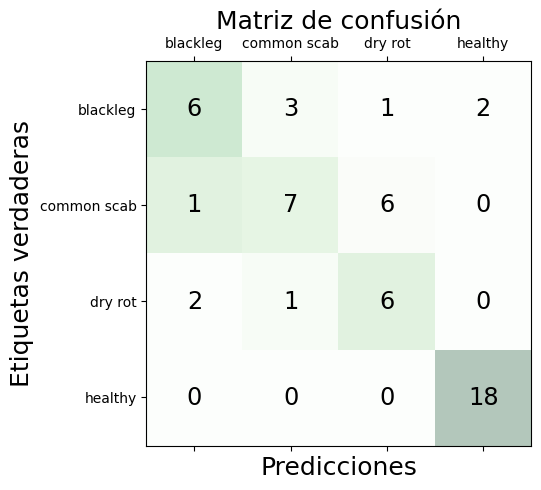

In [41]:
cm_s = confusion_matrix(y_s_test, y_s_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_s, cmap=plt.cm.Greens, alpha=0.3)
for i in range(cm_s.shape[0]):
    for j in range(cm_s.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

labels=['blackleg', 'common scab', 'dry rot', 'healthy']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Etiquetas verdaderas', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()

In [42]:
print('Accuracy  :', accuracy_score(y_s_test, y_s_pred)*100 ,"%")
print('Precision :' , precision_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Clasificador Support Vector Machine para dataset filtro Máximo
La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [43]:
ex_time_max = []
half_time_max = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_max=[]
    target_arr_max=[]
    datadir_max='/content/drive/MyDrive/potato/data_max'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_max.append(img_resized.flatten())
            target_arr_max.append(Categoría.index(i))
    flat_data_max=np.array(flat_data_arr_max)
    target_max=np.array(target_arr_max)
    df_papa_max=pd.DataFrame(flat_data_max)
    df_papa_max['Categoría']=target_max
    df_papa_max

    x_max=df_papa_max.iloc[:,:-1]
    y_max=df_papa_max.iloc[:,-1]
    x_max_train,x_max_test,y_max_train,y_max_test=train_test_split(x_max,y_max,test_size=0.20,random_state=42)

    classifier_max = SVC(kernel = 'rbf', random_state = 0)
    classifier_max.fit(x_max_train, y_max_train)

    y_max_pred = classifier_max.predict(x_max_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_max.append(total)
    half_t = (total/2)
    half_time_max.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 28.111458730000777 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 27.1614351420003 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.9373111470004 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.702288280000175 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.764180348999616 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 24.69890783900064 s
loading... category : blackleg
lo

In [63]:
print("Tiempo mínimo ", min(ex_time_max), 's')
print("Tiempo máximo: ", max(ex_time_max), 's')
print("Tiempo promedio: ", sum(ex_time_max)/len(ex_time_max), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_max), 's')

Tiempo mínimo  14.702288280000175 s
Tiempo máximo:  28.560599374999583 s
Tiempo promedio:  21.959628461133253 s
Desviación estándar del tiempo:  4.654631737114712 s


In [62]:
print("Tiempo mínimo mitad ejecución ", min(half_time_max), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_max))
print("Tiempo promedio mitad ejecución: ", sum(half_time_max)/len(half_time_max), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_max), 's')

Tiempo mínimo mitad ejecución  7.351144140000088 s
Tiempo máximo mitad ejecución:  14.280299687499792
Tiempo promedio mitad ejecución:  10.979814230566626 s
Desviación estándar del tiempo mitad ejecución:  2.327315868557356 s


In [46]:
y_max_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

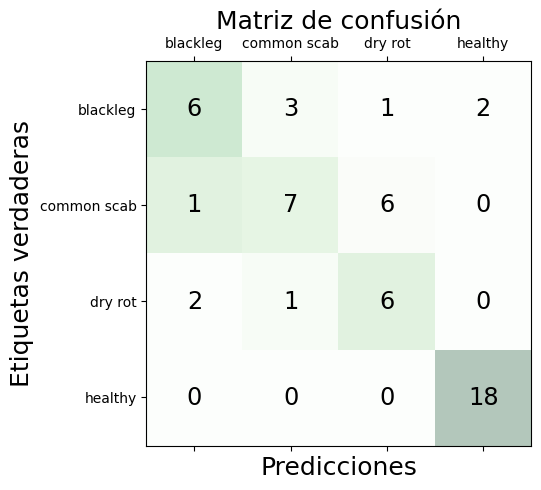

In [47]:
cm_max = confusion_matrix(y_max_test, y_max_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_s, cmap=plt.cm.Greens, alpha=0.3)
for i in range(cm_s.shape[0]):
    for j in range(cm_max.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

labels=['blackleg', 'common scab', 'dry rot', 'healthy']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Etiquetas verdaderas', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()

In [54]:
print('Accuracy  :', accuracy_score(y_max_test, y_max_pred)*100 ,"%")
print('Precision :' , precision_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Clasificador Support Vector Machine para dataset filtro Mínimo
La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [48]:
ex_time_min = []
half_time_min = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_min=[]
    target_arr_min=[]
    datadir_min='/content/drive/MyDrive/potato/data_min'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_min.append(img_resized.flatten())
            target_arr_min.append(Categoría.index(i))
    flat_data_min=np.array(flat_data_arr_min)
    target_min=np.array(target_arr_min)
    df_papa_min=pd.DataFrame(flat_data_min)
    df_papa_min['Categoría']=target_min
    df_papa_min

    x_min=df_papa_min.iloc[:,:-1]
    y_min=df_papa_min.iloc[:,-1]
    x_min_train,x_min_test,y_min_train,y_min_test=train_test_split(x_min,y_min,test_size=0.20,random_state=42)

    classifier_min = SVC(kernel = 'rbf', random_state = 0)
    classifier_min.fit(x_min_train, y_min_train)

    y_min_pred = classifier_min.predict(x_min_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_min.append(total)
    half_t = (total/2)
    half_time_min.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 28.949079502999666 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 19.045412170999953 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.714886349999688 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 17.571942427000067 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 26.253690068999276 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 21.976480372999504 s
loading... category : blackl

In [61]:
print("Tiempo mínimo ", min(ex_time_min), 's')
print("Tiempo máximo: ", max(ex_time_min), 's')
print("Tiempo promedio: ", sum(ex_time_min)/len(ex_time_min), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_min), 's')

Tiempo mínimo  14.714886349999688 s
Tiempo máximo:  28.949079502999666 s
Tiempo promedio:  20.19309627966656 s
Desviación estándar del tiempo:  4.401544810635238 s


In [60]:
print("Tiempo mínimo mitad ejecución ", min(half_time_min), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_min), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_min)/len(half_time_min), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_min), 's')

Tiempo mínimo mitad ejecución  7.357443174999844 s
Tiempo máximo mitad ejecución:  14.474539751499833 s
Tiempo promedio mitad ejecución:  10.09654813983328 s
Desviación estándar del tiempo mitad ejecución:  2.200772405317619 s


In [51]:
y_min_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

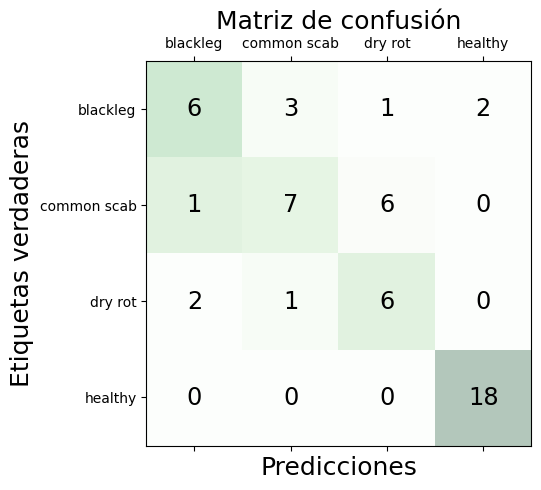

In [52]:
cm_min = confusion_matrix(y_min_test, y_min_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_s, cmap=plt.cm.Greens, alpha=0.3)
for i in range(cm_s.shape[0]):
    for j in range(cm_min.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

labels=['blackleg', 'common scab', 'dry rot', 'healthy']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Etiquetas verdaderas', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()

In [53]:
print('Accuracy  :', accuracy_score(y_min_test, y_min_pred)*100 ,"%")
print('Precision :' , precision_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Análisis de resultados del procesamiento de la muestra del dataset de papas

| **Modelo**      | **Accuracy**                                                                                  | **Precision** | **Recall** | **F1 Score**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |69.8 %| 70.3 %| 69.8 %| 69.2 %|
| **Modelo 2 (SVM filtro Gaussiano)** | 60.4 % | 62.7 %| 60.4 %| 61.4%|
| **Modelo 3 (SVM filtro Sobel)** | 77.4 % | 77.99 %| 77.4 %| 76.8 % |
| **Modelo 4 (SVM filtro Máximo)** |77.4 %  | 77.99 %| 77.4 %|76.8 %|
| **Modelo 5 (SVM filtro Mínimo)** |77.4 % | 77.99 %| 77.4 %|76.8 %|

| **Modelo**      | **t máx (s)**                                                                                  | **t min (s)** | **t prom. (s)** | **std. t (s)**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |18.08| 93.23| 41.19| 18.42|
| **Modelo 2 (SVM filtro Gaussiano)** | 15.90| 118.77| 29.23| 24.44|
| **Modelo 3 (SVM filtro Sobel)** | 17.00| 112.54|41.19| 22.99 |
| **Modelo 4 (SVM filtro Máximo)** |14.70| 28.56| 21.95|4.65|
| **Modelo 5 (SVM filtro Mínimo)** |14.71|28.94|20.19|4.40|

| **Modelo**      | **t/2 máx (s)**                                                                                  | **t/2 min (s)** | **t/2 prom. (s)** | **std. t/2 (s)**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |9.04| 46.62| 20.60| 9.21|
| **Modelo 2 (SVM filtro Gaussiano)** | 7.95| 59.38|14.62|12.22|
| **Modelo 3 (SVM filtro Sobel)** |8.50|56.27|13.91|11.50|
| **Modelo 4 (SVM filtro Máximo)** |7.35|14.28| 10.98|2.33|
| **Modelo 5 (SVM filtro Mínimo)** |7.36| 14.47|10.10|2.20|

# Conclusiones